# Udacity Data Analysis Project 1: TMDb movie data
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
# Introduction
## Overview
To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

## Question that can analyised from this data set
- Movies which had most and least profit
- Movies with largest and lowest budgets
- Movies with most and least earned revenu.
- Movies with longest and shortest runtime values
- Average runtime of all the movies.
- In which year we had most no.of profitable movies.
- Successful genres (with respest to the profitable movies).
- Most frequent cast (with respest to the profitable movies)
- Average budget (with respest to the profitable movies)
- Average revenue (with respest to the profitable movies)
- Average duration of the movie (with respest to the profitable movies)

In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



<a id="wrangling"></a>
# Data Wrangling
After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

## General Properties

In [2]:
data = pd.read_csv('tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
print(data.shape)

(10866, 21)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
print(list(data.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


# Data Cleaning
In this part a trivial data cleaning will be performed. The columns that were selected for the preprocessing will be used for following cells below.



In [7]:
data = data[data["cast"].isnull() == False]
data = data[data["genres"].isnull() == False]

data = data[data.budget_adj != 0]
data = data[data.revenue_adj != 0]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 21 columns):
id                      3851 non-null int64
imdb_id                 3851 non-null object
popularity              3851 non-null float64
budget                  3851 non-null int64
revenue                 3851 non-null int64
original_title          3851 non-null object
cast                    3851 non-null object
homepage                1425 non-null object
director                3850 non-null object
tagline                 3573 non-null object
keywords                3714 non-null object
overview                3851 non-null object
runtime                 3851 non-null int64
genres                  3851 non-null object
production_companies    3807 non-null object
release_date            3851 non-null object
vote_count              3851 non-null int64
vote_average            3851 non-null float64
release_year            3851 non-null int64
budget_adj              3851 non-null flo

#  Removing Unused columns

Columns that we need to delete are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [9]:
del_col=[ 'id', 'imdb_id', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count']

#deleting the columns
data= data.drop(del_col,1)

#previewing the new dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 14 columns):
popularity        3851 non-null float64
budget            3851 non-null int64
revenue           3851 non-null int64
original_title    3851 non-null object
cast              3851 non-null object
director          3850 non-null object
tagline           3573 non-null object
runtime           3851 non-null int64
genres            3851 non-null object
release_date      3851 non-null object
vote_average      3851 non-null float64
release_year      3851 non-null int64
budget_adj        3851 non-null float64
revenue_adj       3851 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 451.3+ KB


In [10]:
sum(data.duplicated())

1

In [11]:
data.drop_duplicates(keep ='first', inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 14 columns):
popularity        3850 non-null float64
budget            3850 non-null int64
revenue           3850 non-null int64
original_title    3850 non-null object
cast              3850 non-null object
director          3849 non-null object
tagline           3572 non-null object
runtime           3850 non-null int64
genres            3850 non-null object
release_date      3850 non-null object
vote_average      3850 non-null float64
release_year      3850 non-null int64
budget_adj        3850 non-null float64
revenue_adj       3850 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 451.2+ KB


<a id="eda"></a>
# Exploratory Data Analysis
## Calculating the profit of the each movie

In [13]:
data.insert(2,'profit_e',data['revenue']-data['budget'])

data.head(2)

,popularity,budget,profit_e,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08


# Question #1: Top Movies based on features
Moving to other features from the TMDb dataset. It would be beneficial to find out which movies had the highest budget, revenue popularity and average votes. So lets find out which are these top 10 movies based on these attributes.

## Question #1.1: Top Movies based on their revenue
The following code snippet produce the barplot representing the top 10 movies based on their adjusted revenue.

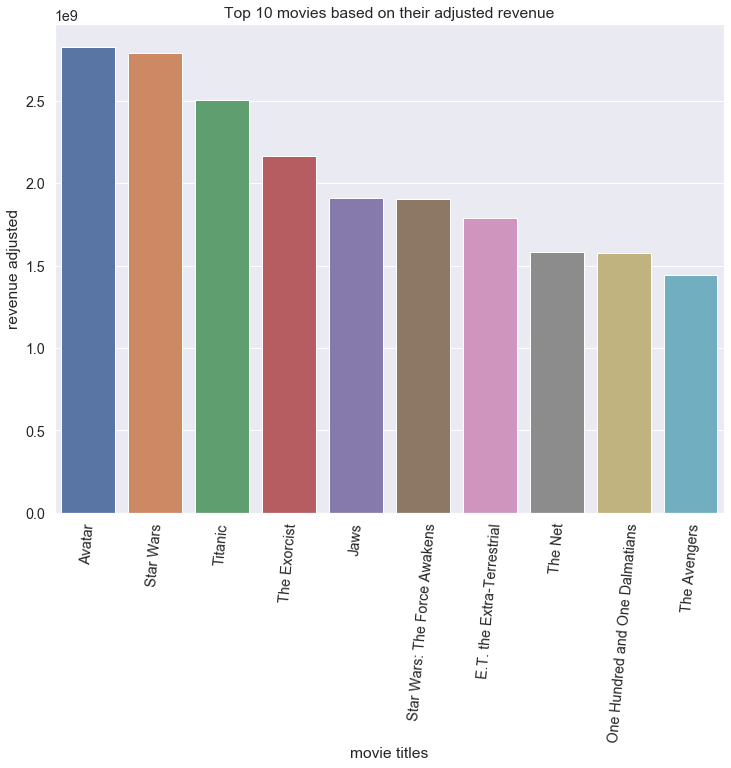

In [14]:
revenue_dict = {}


movies_and_revenue = data[["original_title", "revenue_adj"]]
movies_and_budget = data[['original_title','budget_adj']]
movies_and_popularity = data[['original_title','popularity']]
movies_and_votes= data[['original_title','vote_average']]

sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)


ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)




for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='revenue adjusted', title = 'Top 10 movies based on their adjusted revenue')
plt.show()

## Question #1.2: Top Movies based on their budget

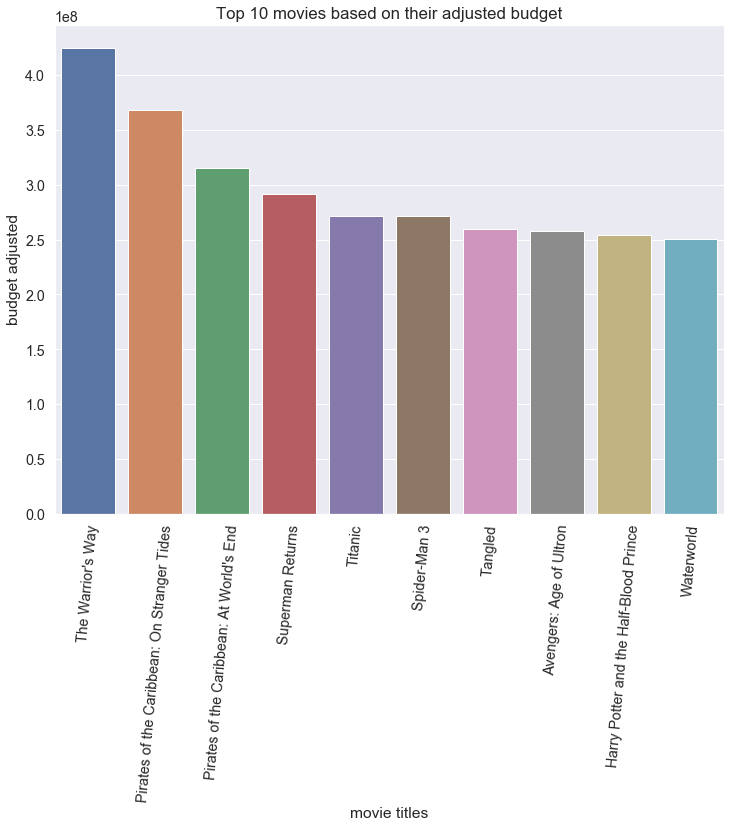

In [15]:
ax = sns.barplot(
    movies_and_budget.sort_values(by = "budget_adj", ascending=False).head(10).original_title, 
    movies_and_budget.sort_values(by = "budget_adj", ascending=False).head(10).budget_adj)


sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)

for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='budget adjusted', title = 'Top 10 movies based on their adjusted budget')
plt.show()

## Question #1.3: Top Movies based on their popularity

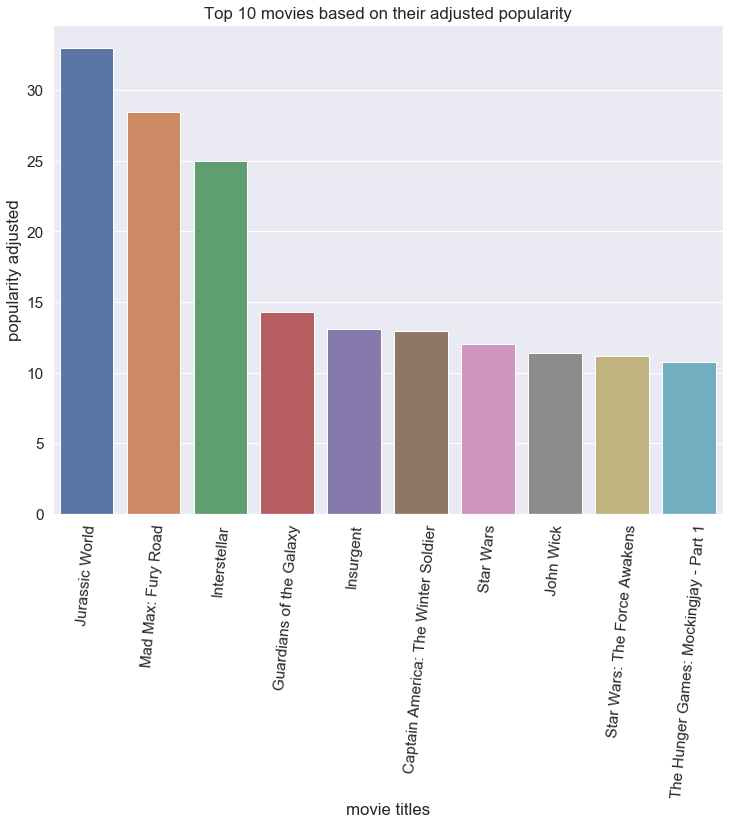

In [16]:
ax = sns.barplot(
    movies_and_popularity.sort_values(by = "popularity", ascending=False).head(10).original_title, 
    movies_and_popularity.sort_values(by = "popularity", ascending=False).head(10).popularity)


sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)

for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='movie titles', ylabel='popularity adjusted', title = 'Top 10 movies based on their adjusted popularity')
plt.show()

## Question #1.4: Top 10 Movies based on their average vote

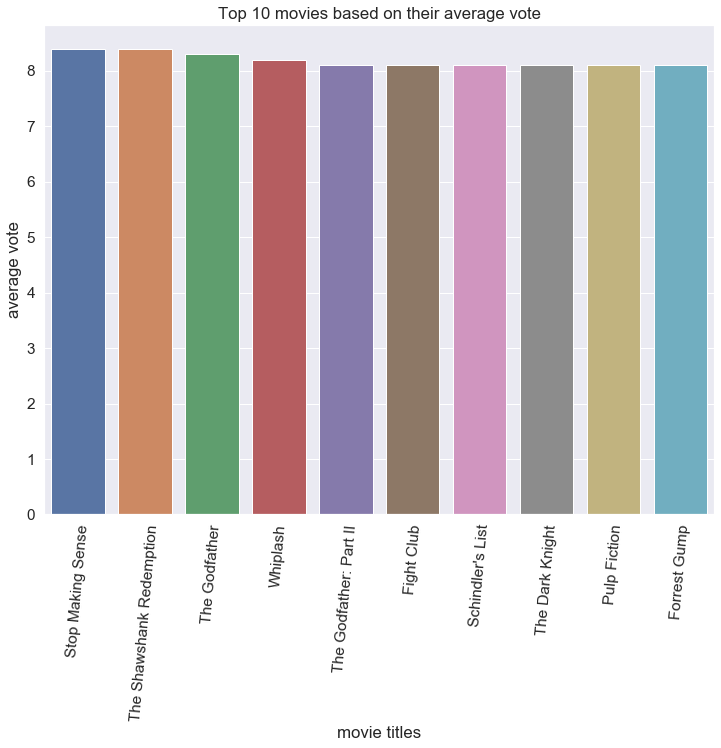

In [17]:
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(10).original_title, 
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(10).vote_average)



for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='average vote', title = 'Top 10 movies based on their average vote')
plt.show()

According to the table above, the top 5 movies from the given dataset based on their adjusted budget are the followings; The Shawshank Redemption, Stop Making Sense, The Godfather, Whiplash and Pulp Fiction.

Although the beautiful plots, from the figures above, someone can mention that It would have been expected that there will be a correlation between the top movies and especially the top 5 based on the previous attributes (adjusted_revenue, adjusted_budget, popularity and average votes). At least someone would assumed that the top 5 movies from feature to feature would be the same. On the contrary this idea does not appear in the previous figures.

## Question #2: Movies which had most and least profit

In [18]:
import pprint
def calculate(column):
    
    high= data[column].idxmax()
    high_details=pd.DataFrame(data.loc[high])
    
    
    low= data[column].idxmin()
    low_details=pd.DataFrame(data.loc[low])
    
    
    info=pd.concat([high_details, low_details], axis=1)
    
    return info


calculate('profit_e')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
profit_e,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


Column with id 1386 shows the highest earned profit i.e 2544505847 .

Whereas the column with id 2244 shows the lowest earned profit i.e -413912431

## Question #3: Movies with longest and shortest runtime 

In [19]:
calculate('runtime')

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
profit_e,-17128721,-5
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


## Question 4: Correlations

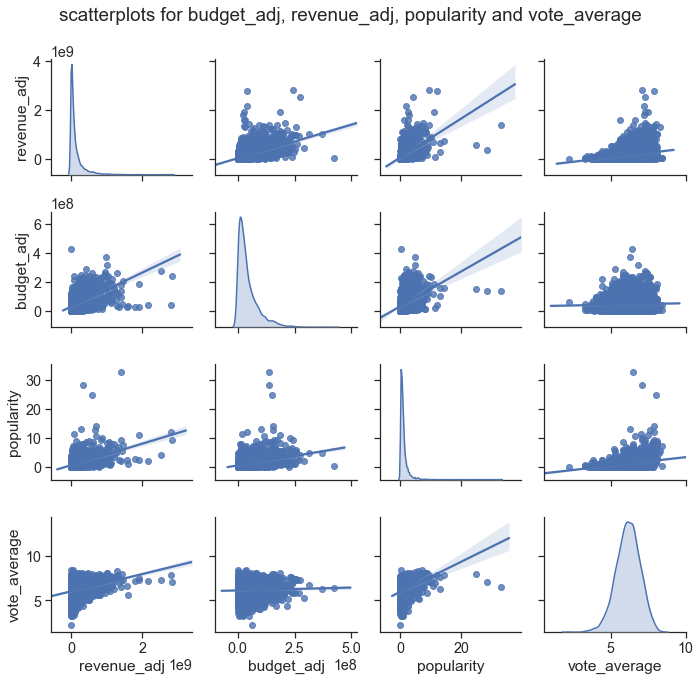

In [20]:
aux_df = data[['revenue_adj', 'budget_adj', 'popularity', 'vote_average']]

sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3, style="ticks")
f1 = sns.pairplot(aux_df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('scatterplots for budget_adj, revenue_adj, popularity and vote_average\n')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Question 5 : Average runtime of the movies

In [21]:
def avg_fun(column):
    return data[column].mean()

In [22]:
avg_fun('runtime')

109.22883116883116

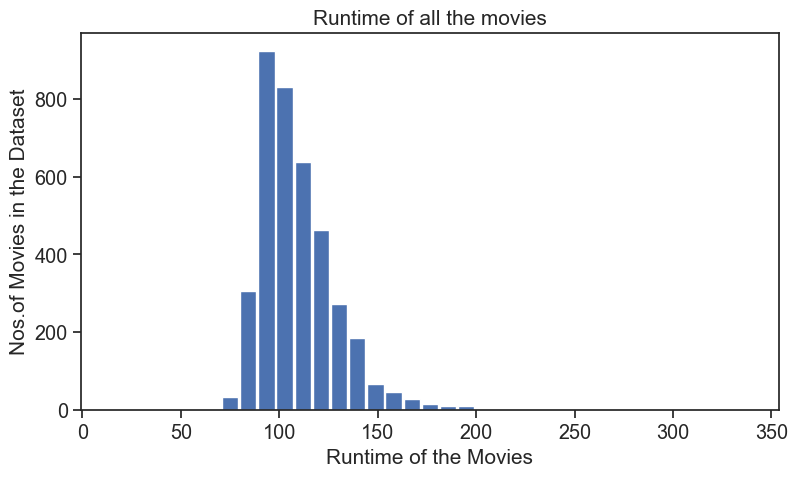

In [23]:

plt.figure(figsize=(9,5), dpi = 100)


plt.xlabel('Runtime of the Movies', fontsize = 15)

plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)

plt.title('Runtime of all the movies', fontsize=15)


plt.hist(data['runtime'], rwidth = 0.9, bins =35)

plt.show()

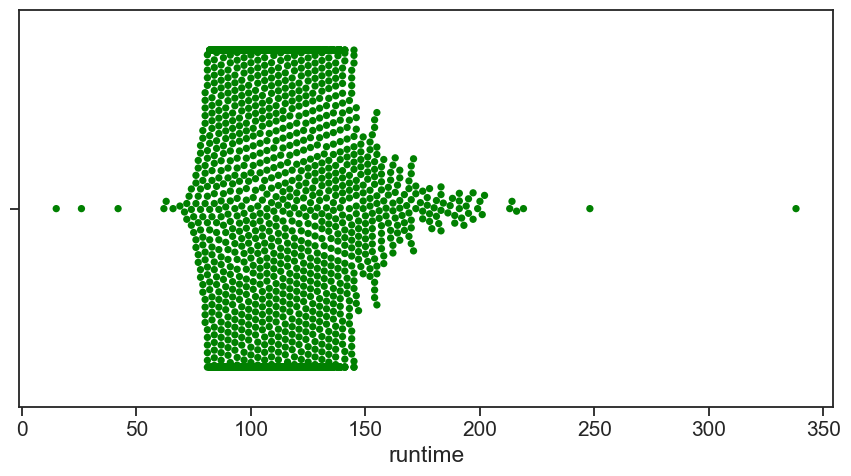

In [24]:
plt.figure(figsize=(10,5), dpi = 105)

sns.swarmplot(data['runtime'], color = 'green')

plt.show()

<a id="conclusions"></a>
# Conclusions
This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values. Fore example null values is an obstacle which stopped me when I was analyzing the top casted actors. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation. There are many famous actors like Robert De Niro who casted in many films all over these years. There are 20 unique movie genres but drama is the one that show an increasing trend all over these years. Finally there is a positive correlation between some of the features of the TMDb dataset.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0